In [11]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import math

In [12]:
# Descargar y preparar datos
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
datos_entrenamiento, _ = datos['train'], datos['test']
nombres_clases = metadatos.features['label'].names

def normalizar(imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32) / 255.0
    return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar).cache()
TAMANO_LOTE = 32
num_ej_entrenamiento = metadatos.splits["train"].num_examples
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)

# Modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
modelo.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

In [13]:
# Entrenar modelo (puede tomar unos segundos)
print("Entrenando el modelo...")
modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch=math.ceil(num_ej_entrenamiento / TAMANO_LOTE))
print("Modelo entrenado con éxito.")

Entrenando el modelo...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7579 - loss: 0.6978
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8552 - loss: 0.4045
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8660 - loss: 0.3646
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8791 - loss: 0.3288
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8863 - loss: 0.3052
Modelo entrenado con éxito.


In [14]:
# Crear carpeta si no existe
if not os.path.exists("imagenes"):
    os.makedirs("imagenes")

# Cargar imagen desde el explorador
def cargar_imagen():
    archivo = filedialog.askopenfilename(
        title="Selecciona una imagen",
        filetypes=[("Archivos PNG", "*.png"), ("Todos los archivos", "*.*")]
    )
    if archivo:
        try:
            destino = os.path.join("imagenes", "camisa.png")
            shutil.copy(archivo, destino)
            messagebox.showinfo("Éxito", "Imagen guardada como 'camisa.png'")
        except Exception as e:
            messagebox.showerror("Error", f"No se pudo guardar la imagen:\n{str(e)}")

In [15]:
# Hacer la predicción con el modelo
def hacer_prediccion():
    ruta = "imagenes/camisa.png"
    if not os.path.exists(ruta):
        messagebox.showwarning("Advertencia", "Primero debes subir una imagen.")
        return
    try:
        imagen = Image.open(ruta).convert('L')  # Escala de grises
        imagen = imagen.resize((28, 28))
        imagen_np = np.array(imagen) / 255.0
        imagen_np = imagen_np.reshape(1, 28, 28, 1)

        prediccion = modelo.predict(imagen_np)
        etiqueta_predicha = np.argmax(prediccion[0])
        porcentaje = 100 * np.max(prediccion[0])
        clase = nombres_clases[etiqueta_predicha]

        # Mostrar resultado con matplotlib
        plt.figure()
        plt.imshow(imagen, cmap=plt.cm.binary)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(f"Predicción: {clase} ({porcentaje:.2f}%)", color='blue')
        plt.show()

    except Exception as e:
        messagebox.showerror("Error al predecir", str(e))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


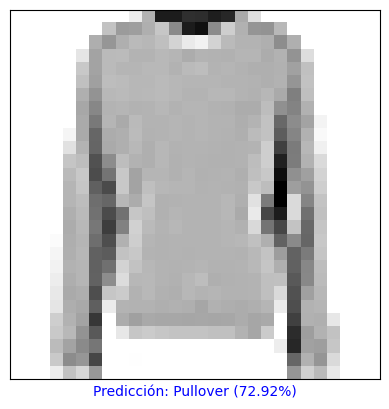

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


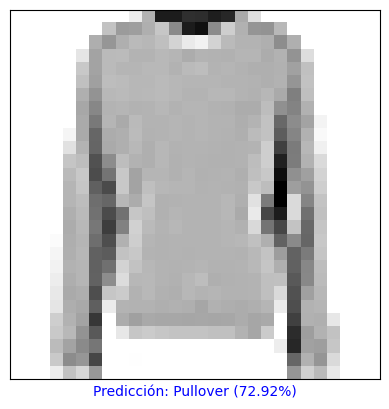

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


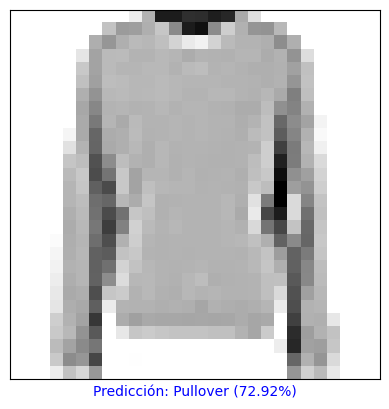

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


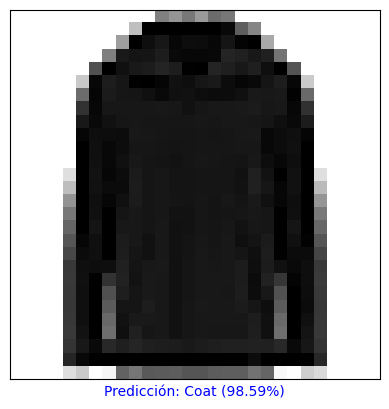

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


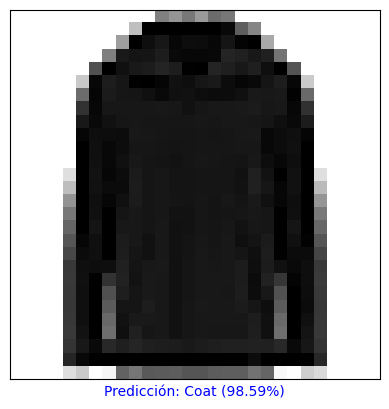

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


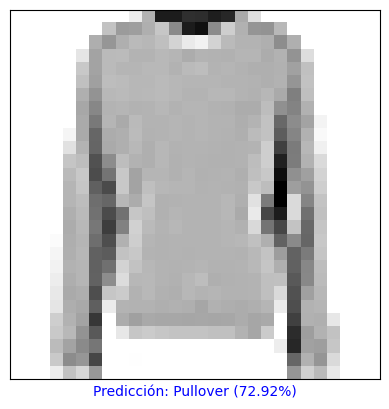

In [16]:
ventana = tk.Tk()
ventana.title("Clasificador de imágenes - Fashion MNIST")
ventana.geometry("500x300")
ventana.configure(bg="white")

etiqueta = tk.Label(ventana, text="Ingresa imagen aquí", font=("Arial", 16), bg="white")
etiqueta.pack(pady=20)

boton_cargar = tk.Button(ventana, text="Seleccionar imagen JPG", command=cargar_imagen,
                         bg="#4CAF50", fg="white", font=("Arial", 12))
boton_cargar.pack(pady=10)

boton_predecir = tk.Button(ventana, text="Hacer predicción", command=hacer_prediccion,
                           bg="#2196F3", fg="white", font=("Arial", 12))
boton_predecir.pack(pady=10)

ventana.mainloop()
